In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

# for the normality test, we use this implementation of the Shapiro-Wilk test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
from scipy.stats import shapiro

# we additionally perform a QQPlot of the residuals
# https://pingouin-stats.org/generated/pingouin.qqplot.html
import pingouin as pg

In [2]:
# reading data
df = pd.read_csv("all_params.tsv", sep="\t", index_col=0)

# Normality test: Shapiro-Wilk
We performed Shapiro-Wilk test on all parameters. Below the details of the analysis implementation and results.

In [3]:
# inspecting each parameter for normality.
# we calculate group-wise residuals, then test them
# for normality with Shapiro-Wilk

residuals_book = {}
failed = []

print("\nNormality analysis report\n", "="*60, "\n", sep="")
for elem in sorted(df.columns[1:]):
    all_residuals = []
    
    for group in df["GROUP"].unique():
        tempdf = df[df["GROUP"] == group]
        values = np.array(tempdf[elem].dropna())
        
        ave = np.average(values)
        residuals = values - ave
        all_residuals.append(residuals)
    
    all_residuals = np.concatenate(all_residuals, axis=0)
    
    stat, pval = shapiro(all_residuals)
    
    if pval < 0.05:
        print(f"{elem}: it appears *not* normal, with p={round(pval, 2)}")
        failed.append(elem)
    else:
        print(f"{elem}: normally distributed")
    
    residuals_book.setdefault(elem, all_residuals)


Normality analysis report

CD3+ around aortic sinus: normally distributed
CD3+ intraplaque: normally distributed
Extracellular Matrix Area %: normally distributed
Extracellular Matrix Area mm2: normally distributed
Macrophage %: it appears *not* normal, with p=0.03
Macrophage area: normally distributed
Necrotic core %: normally distributed
Necrotic core area: normally distributed
abdominal percentage ENFACE: normally distributed
aortic sinus area mm2_: normally distributed
arch percentage ENFACE: normally distributed
cell MASSON: normally distributed
cell percent MASSON: normally distributed
macrophage area: normally distributed
macrophage percent: it appears *not* normal, with p=0.02
macrophage percent MASSON: normally distributed
matrix MASSON: normally distributed
matrix percent MASSON: normally distributed
necrotic core MASSON: normally distributed
necrotic core percent MASSON: normally distributed
neutral lipids area %_: it appears *not* normal, with p=0.01
neutral lipids area mm

# QQplot
Another way of assessing notmality is through the QQplot. Here's the plot for Plaque Area Aortic Sinus. Ideally, normally distributed values should lie in a line, and be within the intervals (red dotted line).

Text(0.5, 1.0, 'plaque area aortic sinus mm2')

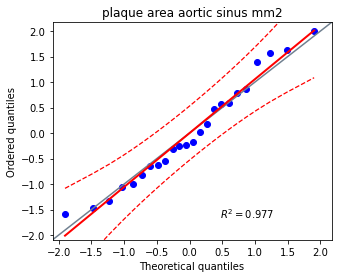

In [4]:
elem = "plaque area aortic sinus mm2"
ax = pg.qqplot(residuals_book[elem])
plt.title(elem)

# Non parametric statistis for non-normal distributions
Even if, in the vast majority of cases, non parametric tests give even lower p-values, we reassess all parameters that do not appear to be normally distributed with Mann-Whitney's U test.

In [5]:
for param in failed:
    group_a, group_b = df["GROUP"].unique()
    x = df[df["GROUP"] == group_a][param]
    y = df[df["GROUP"] == group_b][param]
    test = pg.mwu(x, y)
    print(f"MannWhitney's U test for: {param}")
    print(test)
    print()

MannWhitney's U test for: Macrophage %
     U-val       tail     p-val       RBC      CLES
MWU  106.0  two-sided  0.481664 -0.164835  0.582418

MannWhitney's U test for: macrophage percent
     U-val       tail     p-val       RBC      CLES
MWU   93.0  two-sided  0.661972 -0.107143  0.553571

MannWhitney's U test for: neutral lipids area %_
     U-val       tail     p-val       RBC      CLES
MWU   44.0  two-sided  0.185758  0.333333  0.333333

MannWhitney's U test for: neutral lipids area mm2_
     U-val       tail     p-val       RBC     CLES
MWU   59.0  two-sided  0.689122  0.106061  0.44697

MannWhitney's U test for: thoracic percentage ENFACE
     U-val       tail     p-val       RBC      CLES
MWU  113.0  two-sided  0.489578 -0.158974  0.579487



All these parameters did not reach statistical significance with Student's T test, and likewise they do not reach statistical significance with Mann Whitney's U test.